In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

## Numerical checking of consistency between basic QR, general QR, and SVD representations of OLS estimator

We assume we are fitting a polynomial of degree 3 in the implementation below.

In [15]:
n = 10
p = 4

In [16]:
predictor_values = np.random.rand(n, 1) + 1
intercept_col = np.ones((n, 1))
input_matrix = np.hstack([intercept_col,
                          predictor_values, 
                          np.power(predictor_values, 2), 
                          np.power(predictor_values, 3)])

In [17]:
# give the response vector some form of relation to the predictors, then add noise
f = np.power(predictor_values, 3) + 93 * np.power(predictor_values, 1)
f += np.random.normal(0, 1, (n, 1))

In [18]:
# basic QR
Q, R = np.linalg.qr(input_matrix)

In [19]:
# general QR
Q_squiggle, R_squiggle, P_idx = scipy.linalg.qr(input_matrix, pivoting=True, mode='economic')
P = np.zeros((p, p))
P[P_idx, np.arange(0, p)] = 1 # creating the permutation matrix

In [20]:
# SVD
U, S, V_transpose = np.linalg.svd(input_matrix, full_matrices=False)
S = np.diag(S)
V = V_transpose.T

In [21]:
c_qr = np.linalg.inv(R) @ Q.T @ f
c_qr_general = P @ np.linalg.inv(R_squiggle) @ Q_squiggle.T @ f
c_svd = V @ np.linalg.inv(S) @ U.T @ f

In [22]:
c_qr, c_svd, c_qr_general

(array([[ 90.93349053],
        [-95.40210495],
        [125.59251336],
        [-26.17141277]]),
 array([[ 90.93349053],
        [-95.40210495],
        [125.59251336],
        [-26.17141277]]),
 array([[ 90.93349053],
        [-95.40210495],
        [125.59251336],
        [-26.17141277]]))

These look the same!

## Plotting the polynomials

In [10]:
poly_slopes = c_qr.flatten()[::-1] # order reversed to align with numpy's default format

In [11]:
sample_x_space = np.linspace(1, 2, 100)
best_fit_values = np.polyval(poly_slopes, sample_x_space)

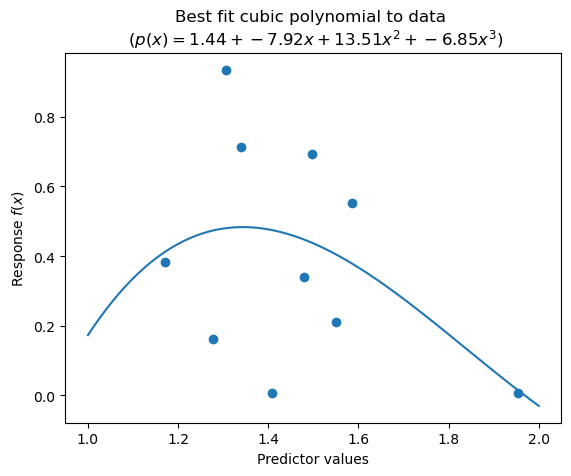

In [12]:
plt.plot(sample_x_space, best_fit_values)
plt.scatter(predictor_values, f)
plt.xlabel("Predictor values")
plt.ylabel(r"Response $f(x)$")
poly_slopes = np.round(poly_slopes, 2)
plt.title(f"Best fit cubic polynomial to data \n ($p(x) = {poly_slopes[0]} + {poly_slopes[1]}x + {poly_slopes[2]}x^2 + {poly_slopes[3]}x^3$)")
plt.show()